<a href="https://colab.research.google.com/github/YashabZehra/Deep-Learning-projects/blob/main/MNIST_digit_classfication_deep_elarning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras import layers, models

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of numpy arrays
print(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)


(None, ((10000, 28, 28), (10000,)))

Training Dataset = 60,000

Testing Dataset = 10,000

Greyscale images of dimension = 28*28

In [5]:
#printing 10th image from dataset
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

3


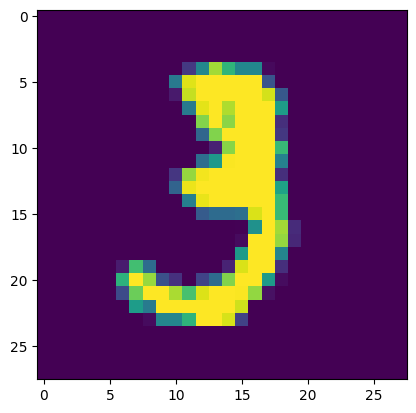

In [6]:
#displaying 10th image
plt.imshow(X_train[10])
plt.show
#printing corresponding label
print(Y_train[10])

Image Labels


In [7]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [8]:
#unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as it is or we can also apply one hot encoding

# **Normalization**


In [9]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [10]:
print(X_test[10])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

# **Building The Neaural Network**

In [11]:
#setting up the layer of neural network
#input.shape = dimension/the required flattening value height by width
#28,28= 28rows, 28 coloumns
#50=neurons
#10=no. of eurons at ouput layer 10 because we have 10 disticnt no.s
model=keras.Sequential([
    # keras.layers.Flatten(input_shape=(28,28)),
    # keras.layers.Dense(50, activation='relu'),
    # keras.layers.Dense(50, activation='relu'),
    # keras.layers.Dense(10, activation='sigmoid')

    #first convolutional layer

    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    #second convolutional layer
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #flatten and fully connected layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation ='relu'),
    keras.layers.Dense(10, activation ='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
#training the neural network
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9971 - loss: 0.0079 - val_accuracy: 0.9888 - val_loss: 0.0618
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9913 - val_loss: 0.0513
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9917 - val_loss: 0.0563
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0062 - val_accuracy: 0.9912 - val_loss: 0.0528
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9979 - loss: 0.0051 - val_accuracy: 0.9908 - val_loss: 0.0685
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0071 - val_accuracy: 0.9917 - val_loss: 0.0628
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9898 - val_loss: 0.0653
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9990 - loss: 0.0033 - 

Training data accuracy with simple feed forward = 99.01%

Training data accuracy with cnn = 99.88%

# **Accuracy on test data**

In [49]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0566
0.9902999997138977


Test data accuracy = 96.92%

In [50]:
print(X_test.shape)

(10000, 28, 28, 1)


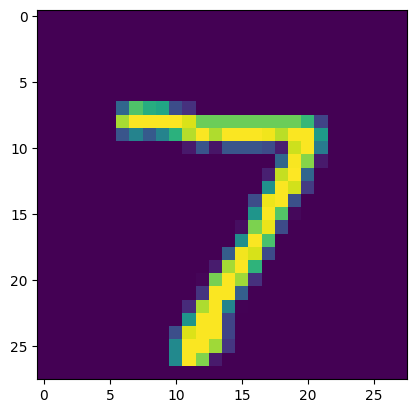

In [51]:
#plotting first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [52]:
print(Y_test[0])

7


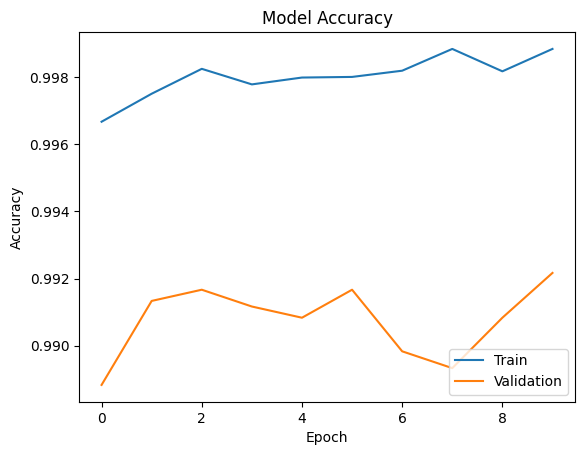

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


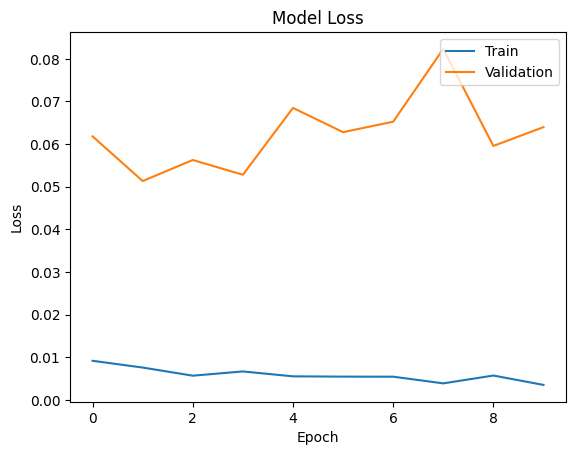

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[2.1486805e-12 2.9485448e-12 2.6624742e-11 8.5135982e-11 4.8560177e-16
 5.7883758e-15 3.3367516e-23 1.0000000e+00 4.4230153e-12 2.0138093e-10]


model.predict() gives the prediction of each class

In [21]:
#converting the prediction to class label
label_for_the_first_image=np.argmax(Y_pred[0])
print(label_for_the_first_image)

7


In [22]:
##converting the prediction to class label for all data points
Y_pred_labels= [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [23]:
print(Y_pred)

[[2.1486805e-12 2.9485448e-12 2.6624742e-11 ... 1.0000000e+00
  4.4230153e-12 2.0138093e-10]
 [1.1688638e-11 6.4128676e-07 9.9999940e-01 ... 2.5170713e-13
  4.7069367e-15 3.7112558e-15]
 [3.2571933e-12 1.0000000e+00 5.0761556e-14 ... 5.2691860e-09
  1.5182522e-09 2.3422611e-14]
 ...
 [3.4696135e-19 1.4024379e-13 5.8798155e-17 ... 7.0230047e-13
  3.7513082e-09 8.8788579e-13]
 [1.5852739e-17 1.9046385e-20 2.6351423e-22 ... 1.3205770e-22
  5.0326104e-10 3.4852118e-20]
 [1.9820898e-13 1.3956166e-14 2.2335327e-16 ... 4.7205190e-21
  4.4283566e-13 1.3332246e-17]]


Y_test -> True labels

Y_pred_labels -> Predicted labels

Confusion matrix

In [24]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 973    1    0    0    1    1    3    1    0    0]
 [   0 1133    0    0    0    0    1    0    1    0]
 [   1    2 1016    1    0    0    0    7    5    0]
 [   0    2    1 1003    0    3    0    0    1    0]
 [   0    2    0    0  971    0    1    2    0    6]
 [   2    0    0    6    0  880    1    0    1    2]
 [   1    2    0    0    0    5  949    0    0    1]
 [   0    2    2    0    0    1    0 1022    1    0]
 [   1    0    1    2    0    3    0    2  961    4]
 [   0    0    0    1    4    3    0    9    3  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

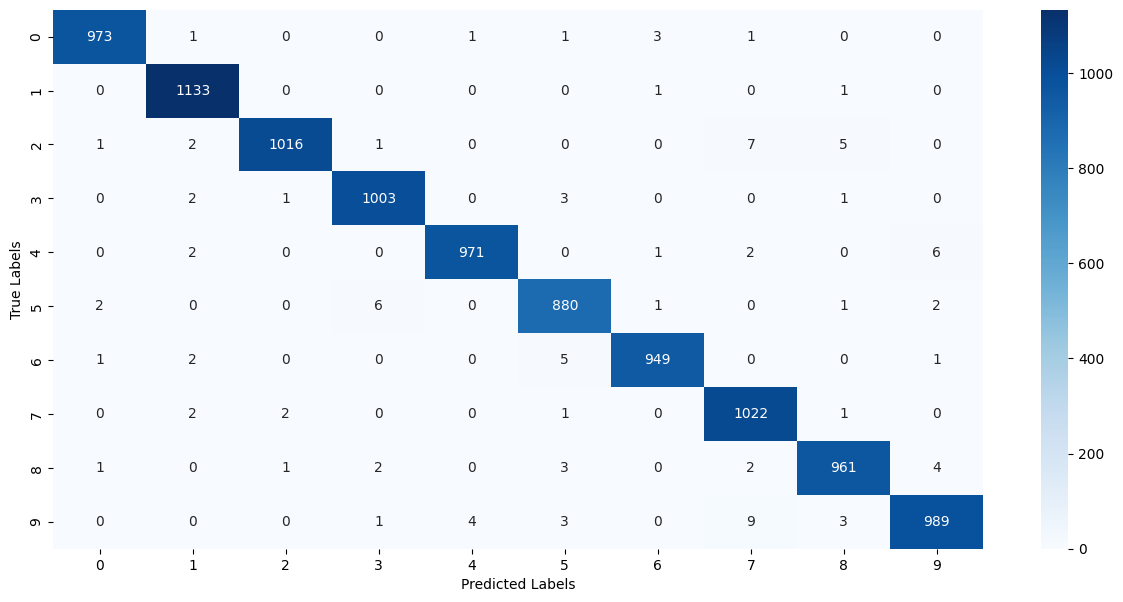

In [26]:

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# **Confusion Matrix**

# **Building a predictive model system**

In [31]:
input_image_path ='/sample_image.png'
input_image = cv2.imread(input_image_path)

In [32]:
type(input_image)

numpy.ndarray

In [33]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


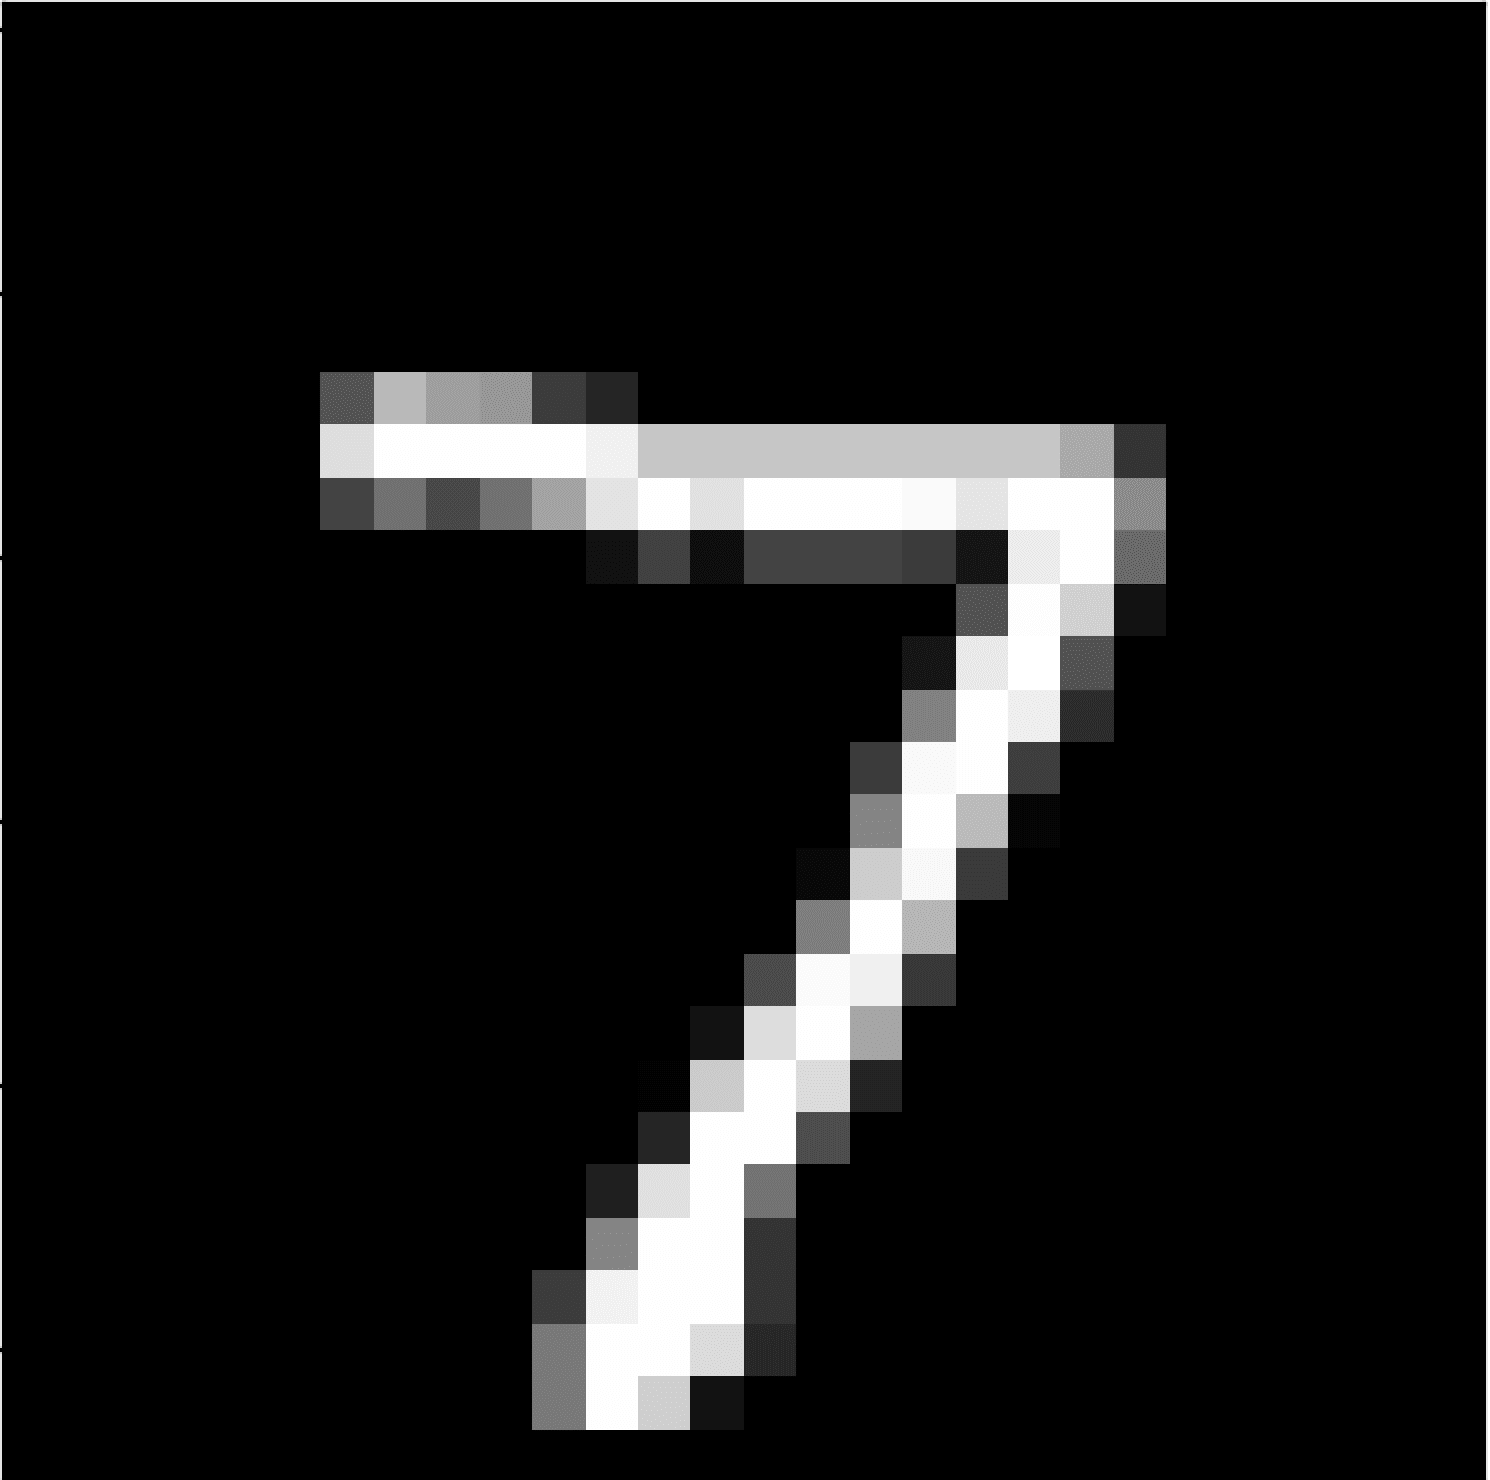

In [34]:
cv2_imshow(input_image)

In [35]:
print(input_image.shape)

(1480, 1490, 3)


#now the input image is grayscale but in model it is taken as rgb image and size is also not 28*28. now we need to convert image from rgb to grey scale then from 1480 * 1480 to 28 * 28

In [36]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [37]:
grayscale.shape

(1480, 1490)

In [38]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [39]:
input_image_resize.shape

(28, 28)

In [40]:
cv2_imshow(input_image_resize)

In [41]:
#scaling image in between 0 to 1
input_image_resize = input_image_resize/255

In [42]:
#reshaping only 1 image to 28*28
image_reshaped = np.reshape(input_image_resize,[1,28,28,1])

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
[[2.2181560e-12 2.7920364e-12 2.8467746e-11 8.5328460e-11 4.6722856e-16
  6.0243571e-15 3.4395869e-23 1.0000000e+00 4.2536374e-12 2.1022342e-10]]


In [44]:
input_pred_label = np.argmax(input_prediction)

In [45]:
print(input_pred_label)

7
